# The Titanic: A Tale of Tragedy and Data

Over a century ago, in 1912, the RMS Titanic embarked on its maiden voyage, holding the hopes and dreams of many aboard. Hailed as the "unsinkable" ship, its tragic sinking after colliding with an iceberg remains one of the most infamous maritime disasters in history. Of the 2,224 passengers and crew members aboard, over 1,500 lost their lives, making the event a somber testament to the limits of human hubris and the vulnerabilities of technology.

While the Titanic's story has been retold through numerous films, books, and documentaries, it also presents a unique data challenge. The Titanic dataset, which we'll delve into in this notebook, holds information about the passengers - from their age and gender to the fare they paid for their ticket. As aspiring data scientists in the field of Computational Social Science, our goal is to use this data not just to understand the tragedy better, but to also draw insights into socio-economic patterns of that era and, most importantly, predict survival based on various features.

**Objectives of this Notebook**:

1. **Understanding the Dataset**: Before any analysis, it's crucial to understand the nature and structure of our data. What information do we have? What might be missing?

2. **Building a Baseline Model**: We'll dive into the world of supervised machine learning by predicting survival on the Titanic. But before we get sophisticated, let's see how well we can do with a simple, minimally processed dataset.

3. **The Power of Feature Engineering**: After establishing a baseline, we'll explore the art and science of feature engineering. How can we extract or transform data to make it more valuable for our predictions?

4. **Evaluation & Interpretation**: A model is only as good as its performance. We'll learn how to gauge the effectiveness of our predictions and interpret the results in the broader context of socio-economic indicators.

5. **Broadening our Toolkit**: While we'll start with a logistic regression model, the world of machine learning is vast. We'll also get a glimpse of another model, the Decision Tree, and understand its strengths.

By the end of this notebook, not only will you have a better appreciation for the intricacies of the Titanic dataset, but you'll also possess a foundational understanding of supervised machine learning, the importance of feature engineering, and the tools for model evaluation. So, let's embark on this analytical journey and unravel the patterns hidden in the Titanic's data!



#### Setup and requirements

Let's start by installing the required packages if you haven't done so already. Uncomment the following cell with command Ctrl+/ and run it to install the packages.

In [10]:
# !pip install pandas numpy scikit-learn

In [11]:
# !pip install matplotlib seaborn

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier


## Understanding the dataset

### Loading the dataset

Let's load the provided dataset with the data about the passengers into a pandas DataFrame and start exploring it.

In [40]:
# The data paths
training_data_path = 'train.csv'
test_data_path = 'test.csv'

# Read the data
training_data = pd.read_csv(training_data_path)
test_data = pd.read_csv(test_data_path)

display(training_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Looking at the data

Here we see the data that we are working with in a tabular format. It is important to get a good grasp of the data to see if their are any patterns or attributes that might turn out useful for us in predicting the survival of passengers. As a starter, let's take a look at all the columns our data has:

- **PassengerId**: The unique ID of each passenger
- **Survived**: Whether the passenger survived or not, 1 indicates the passanger survived; 0 if not.
- **Pclass**: Ticket class 
- **Name**: The name of the passenger, including a title
- **Sex**: Sex
- **Age**: Age in years
- **SibSp**: # of siblings / spouses aboard the Titanic
- **Parch**: # of parents / children aboard the Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Where did the passenger embark? S = Southampton, C = Cherbourg, Q = Queenstown

Now that we have a general idea of what the data looks like, let's make some adjustments to make it easier to work with.

## Data Transformation
As observed in the dataset, our variables consist of different datatypes. Features like `Survived` and `Pclass` are integers, whereas `Sex` and `Embarked` are strings. Machine learning models operate primarily on numerical data, requiring us to convert non-numerical values into a numerical format.

Categorical data, such as Sex and Embarked, fall into two categories:

- **Ordinal**: These have a natural order, like 'low', 'medium', 'high', or the `Pclass` in our dataset.
- **Nominal**: These lack a natural order, like 'male' and 'female' or city names.
For ordinal data, a simple integer encoding might suffice, representing each category with a unique integer. However, for nominal data, this can introduce unintentional relationships. For instance, encoding 'male' as 1 and 'female' as 2 might suggest a numeric order, confusing the model.

This is where one-hot encoding comes into play. It transforms each nominal category into a new binary column. For Sex, we'd get two columns: is_Male and is_Female. An observation with 'male' would be represented as `is_Male` = 1 and `is_Female` = 0. However, in the case of this dataset, `is_Male` is the negation of `is_Female`, therefore we will only need one column to contain all information about sex.

One-hot encoding ensures our machine learning models treat these values as distinct categories without imposing an artificial order, making our data suitable for training.

### Assignment 1: Transform the data (4 pts)
Now it is up to you to create one-hot encoding for the categorical data in our dataset. For this, we can use pandas built-in function `get_dummies`. Check out the documentation and complete the function below: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [1]:
import pandas as pd

def transform_data(df):
    """
    Transforms the input dataframe by encoding categorical variables in 4 ways:
        1. Use pd.get_dummies to encode the 'Sex' column, set the 'drop_first' parameter to True.
        2. Do the same for the 'Embarked column'
        3. Concatenate the original dataframe with the newly generated columns.
        4. Drop the original columns.
        
    Please do not rename any columns, 
    your solution will not pass the auto-graded tests if you do; 
    It's better if they do.
    
    Parameters:
    - df : DataFrame : Input dataset
    
    Returns:
    - df_transformed : DataFrame : Transformed dataset with one-hot encoded columns.
    """
    ### BEGIN SOLUTION
    sex_encoding = pd.get_dummies(df['Sex'], prefix='is', drop_first=True)
    embarked_encoding = pd.get_dummies(df['Embarked'], prefix='embarked', drop_first=False)
    age_known = (df["Age"].isna() == False).rename("Age_known")
    df_transformed = pd.concat([df, sex_encoding, embarked_encoding, age_known], axis=1)
    df_transformed.drop(columns=['Sex', 'Embarked'], inplace=True)
    ### END SOLUTION
    
    return df_transformed

train_set = transform_data(training_data)
test_set = transform_data(test_data)

display(train_set.head())
display(test_set.head())


NameError: name 'training_data' is not defined

In [36]:
# Sample data
sample_data = pd.DataFrame({
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['C', 'S', 'Q', 'S'],
    'Age': [22, 28, 35, 54]
})

test_data = transform_data(sample_data.copy())

### BEGIN HIDDEN TESTS
# Check if original columns are removed
assert 'Sex' not in test_data.columns, "The 'Sex' column should be removed."
assert 'Embarked' not in test_data.columns, "The 'Embarked' column should be removed."
### END HIDDEN TESTS

In [23]:
### BEGIN HIDDEN TESTS
# Check for one-hot encoded columns
possible_sex_cols = sum(["male" in col.lower() or "female" in col.lower() for col in test_data.columns])
assert possible_sex_cols >= 1, "There should be at least one column related to 'Sex' encoding."

possible_embarked_cols = sum(["C" in col or "S" in col or "Q" in col for col in test_data.columns])
assert possible_embarked_cols >= 2, "There should be at least two columns related to 'Embarked' encoding."
### END HIDDEN TESTS

In [24]:
### BEGIN HIDDEN TESTS
# Check data integrity
assert len(sample_data) == len(test_data), "The number of rows should remain unchanged."
male_encoded_values = sum([test_data[col].sum() for col in transformed_data.columns if "_male" in col.lower()])
assert male_encoded_values == 2, "There should be two 'male' entries in the sample data."
### END HIDDEN TESTS

Great! Now that our data is in a more numerical format we can look into any correlations that might help us in making predictions. Let's take a look at a correlation matrix. Pandas has a built-in function for this that calculates the Pearson correlation between every combination of two variables.

The Pearson correlation coefficient, often denoted as $r$, is a measure that captures the strength and direction of a linear relationship between two variables. It returns a value between -1 and 1:

- Close to 1: Indicates a strong positive linear relationship.
- Close to -1: Indicates a strong negative linear relationship.
- Close to 0: Indicates little to no linear relationship between the variables.

Mathematical Definition:

Given two variables, $X$ and $Y$, with data points $x_1, x_2, ... x_n$ and $y_1, y_2, ... y_n$ respectively, the Pearson correlation coefficient $r$ is defined as:

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

Where:

- $\bar{x}$  is the mean of variable $X$.
- $\bar{y}$ is the mean of variable $Y$.

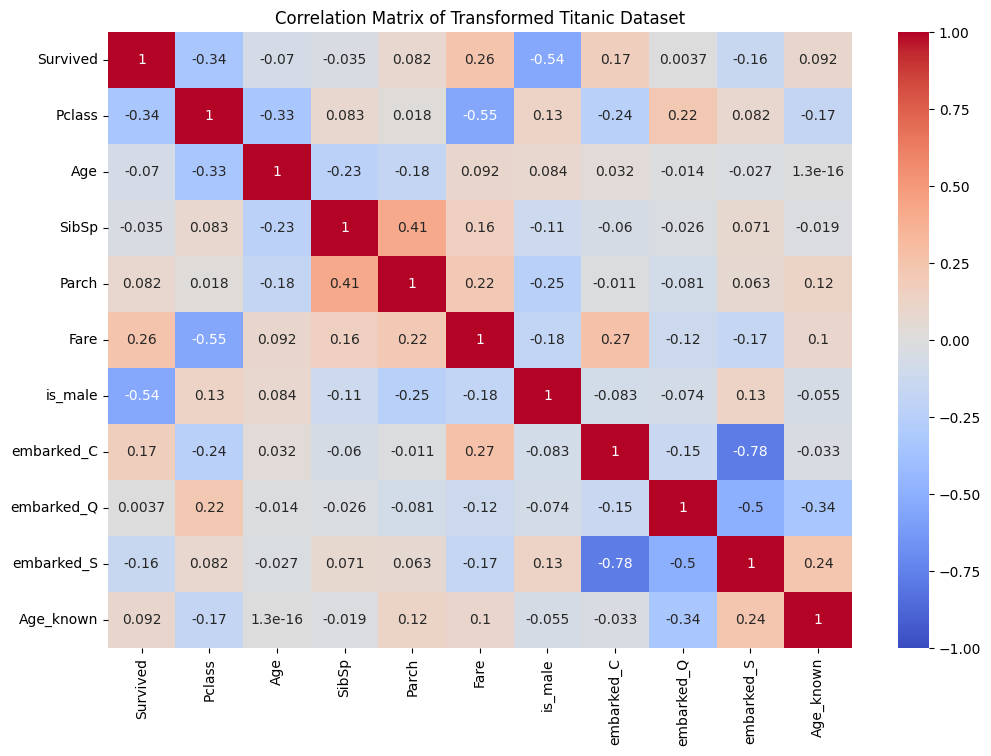

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix with the designated columns, for now we disregard any non-numerical features.
corr_matrix = train_set[['Survived', 
                         'Pclass', 
                         'Age', 
                         'SibSp', 
                         'Parch', 
                         'Fare', 
                         'is_male', 
                         'embarked_C', 
                         'embarked_Q', 
                         'embarked_S']].corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Transformed Titanic Dataset")
plt.show()


### Assignment 2: Plot interpretation (4 pts)
Answer the following questions about the plot in the cell below:

1. Why are values along the diagonal $1$?
2. Which two distinct features show the strongest correlation?
3. Had we still included the `is_female` column, what would be the Pearson coefficient with `is_male`?
4. Which single feature is the most important in predicting our target label?


1. The diagonal shows the correlation between a value and itself, therefore the correlation is 1.
2. The two features that show the strongest correlation are `Embarked_S` and `Embarked_C`.
3. Because these values are mutually exclusive these would show a correlation of -1.
4. The single feature that shows the strongest correlation with the `Survived` label is `is_male`.

### Assignment 3: Creating our first model (6 pts)

-- Here there will be some basic explanation about decision trees.

-- Maybe ask if they could make a decision tree with on decision what would it be to check intuition.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting data into training and test set, for your features, make sure you exclude the target class and any non-numerical features.

### BEGIN SOLUTION
X = train_set[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_male', 'embarked_C', 'embarked_Q', 'embarked_S']]
y = train_set['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
### END SOLUTION

def train_decision_tree(X_train, y_train):
    """
    Train a Decision Tree classifier on the provided training data and labels.
    
    Parameters:
    - X_train : DataFrame : Training features
    - y_train : Series : Training labels
    
    Returns:
    - clf : DecisionTreeClassifier : Trained Decision Tree classifier
    """
    
    ### BEGIN SOLUTION
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    ### END SOLUTION
    
    return clf

# Autograding tests
clf = train_decision_tree(X_train, y_train)
y_pred = clf.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 78.21%


In [21]:
assert 'Survived' not in X.columns

### BEGIN HIDDEN TESTS
assert isinstance(clf, DecisionTreeClassifier)
assert accuracy_score(y_test, y_pred) > 0.7
### END HIDDEN TESTS

To be continued with... random forests? Some feature engineering?